In [146]:
import pandas as pd

In [147]:
tranmission_cost=0.03097796143
high_cost=0.17907063197
low_cost=0.03450765864

spreadsheet = pd.read_csv('836C04-Home-1H.csv')

In [148]:
spreadsheet.index = pd.to_datetime(spreadsheet['Time Bucket (America/New_York)'])

In [149]:
weekday = pd.Series(spreadsheet.index.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))

high = spreadsheet[weekday.values]
high = high.between_time("07:00:00", "20:59:00")

In [150]:
low = spreadsheet[weekday.values]
low =  low.between_time("21:00:00", "06:59:00")

In [151]:
weekend = spreadsheet[pd.Series(spreadsheet.index.day_name().isin(['Saturday', 'Sunday'])).values]

In [152]:
low = pd.concat([low,weekend])

In [153]:
high_total = high['Home-Mains_B (kWhs)'].sum() + high['Home-Mains_C (kWhs)'].sum()
high_total_cost = high_total*high_cost + high_total*tranmission_cost

In [154]:
low_total = low['Home-Mains_B (kWhs)'].sum() + low['Home-Mains_C (kWhs)'].sum()
low_total_cost = low_total*low_cost + low_total*tranmission_cost

In [155]:
orig_total = spreadsheet['Home-Mains_B (kWhs)'].sum() + spreadsheet['Home-Mains_C (kWhs)'].sum()

In [158]:
data = [[low_total,high_total, high_total+low_total, orig_total, low_total_cost, high_total_cost]]
summary = pd.DataFrame(data, index=['2022'], columns=['21-07 tier kWh','07-21 tier kWh', 'total kWh', 'total kWh', '21-07 cost', '07-21 cost'])
summary

,21-07 tier kWh,07-21 tier kWh,total kWh,total kWh,21-07 cost,07-21 cost
2022,5520.4071,2665.9108,8186.3179,8186.3179,361.507282,559.970814


/tmp/ipykernel_87/3803210979.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (high.groupby(high.index.month)['Home-Mains_B (kWhs)', 'Home-Mains_C (kWhs)'].sum()).plot.bar()


<Axes: xlabel='Time Bucket (America/New_York)'>

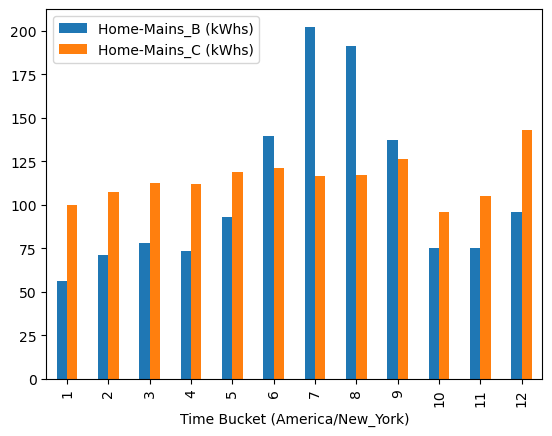

In [157]:
(high.groupby(high.index.month)['Home-Mains_B (kWhs)', 'Home-Mains_C (kWhs)'].sum()).plot.bar()

In [167]:
# https://unboundsolar.com/solar-information/sun-hours-us-map
# Used max since our highest usage is in July
sunhours = 4.7
highmonth = high.groupby(high.index.month)
maxkwh = (highmonth['Home-Mains_B (kWhs)'].sum() + highmonth['Home-Mains_C (kWhs)'].sum()).max()
# https://unboundsolar.com/blog/how-to-size-solar-system
dcsize = (((maxkwh/30)/sunhours)*1.15)
dcsize

2.6010920212765956